### Stim Logical vs. Physical Error Rate

Here we plot the logical X error rate, against the physical error rate on data qubits.

In [67]:
import stim
import numpy as np
import matplotlib.pyplot as plt

In [86]:
d = 5
batch_size = 100000
p_phys = np.logspace(-4, -0.5, num=200)
results = []


In [87]:
for p in p_phys:
    # load circuit with respective X error rate
    circuit_file = open("sf-d5-memory.stim")
    circuit_file = circuit_file.read().replace("0.007", str(p))
    circuit = stim.Circuit(circuit_file)

    # This is for sampling from detectors (which introduces temporal dependencies)
    detector_sampler = circuit.compile_detector_sampler()
    shots = detector_sampler.sample(batch_size, append_observables=True)

    # logical observable along boundary
    actual_observable_parts = shots[:, circuit.num_detectors :]
    results.append(np.sum(actual_observable_parts)/batch_size)

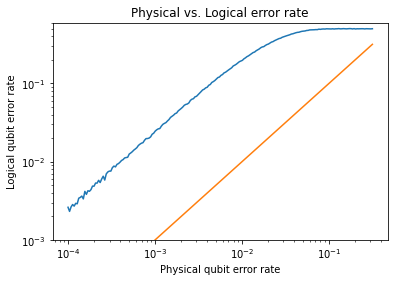

In [93]:
plt.plot(p_phys, results)
plt.plot(p_phys, p_phys)
plt.ylim(1e-3, 0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Physical vs. Logical error rate")
plt.xlabel("Physical qubit error rate")
plt.ylabel("Logical qubit error rate")
plt.show()